In [1]:
include("../encoding.jl")
include("../plotting.jl")

visualize_pxy (generic function with 2 methods)

In [2]:
using Distributions

In [3]:
function dataset1(n, x)
    f(x) = x
    xs = rand(n)
    fs = f.(xs) .+ xs.*rand(Normal(0,0.2), n);
    
    #standardscaling
    l = minimum(vcat(fs,y))
    u = maximum(vcat(fs,y))    
    s = u-l
    return xs, (fs.-l)/s, (f.(x).-l)/s #, (y.-l)/s
end
function dataset2(n,x)
    f(x) = x.*((sin.(20*x) .+1) ./2)
    xs = rand(n)
    fs = f.(xs) .+ rand(Normal(0,0.05), n);
    
    #standardscaling
    l = minimum(vcat(fs,y))
    u = maximum(vcat(fs,y))    
    s = u-l
    return xs, (fs.-l)/s, (f.(x).-l)/s #, (y.-l)/s
end

dataset2 (generic function with 1 method)

In [4]:
x = range(0,1,length=100)
y = range(0,1,length=100)

0.0:0.010101010101010102:1.0

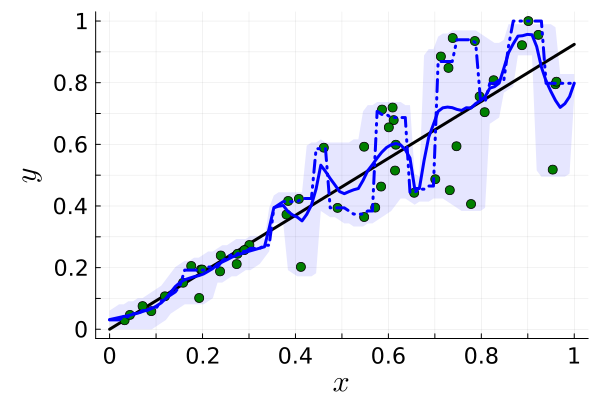

In [149]:
xs,fs,ftrue = dataset1(50,x); #function values are min-max scaled

bipolar=false
l,D = 0.1, 20_000
encoder = realvalue_encoder(l,D, bipolar=bipolar);
Δx = encode(encoder, x)
Δxs = encode(encoder, xs)
Δy = circshift(encode(encoder, y), (0,1));
Δfs = circshift(encode(encoder, fs), (0,1));

P = mean(Δxs .* Δfs, dims=1)
pxy = Δx .* P * Δy' /D;

pl = visualize_pxy(pxy,y)
save(pl, "linear")
pl

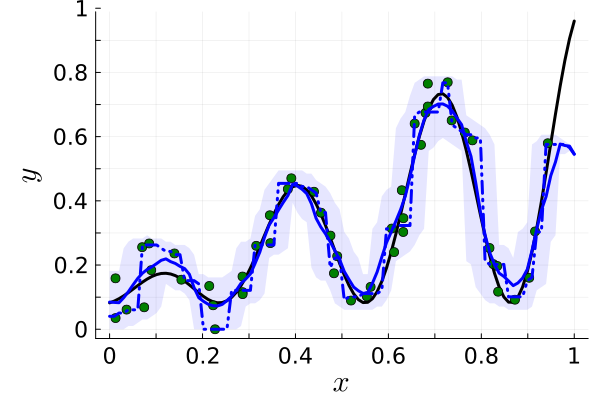

In [12]:
xs,fs,ftrue = dataset2(50,x); #function values are min-max scaled

bipolar=false
l,D = 0.1, 20_000
encoder = realvalue_encoder(l,D, bipolar=bipolar);
Δx = encode(encoder, x)
Δxs = encode(encoder, xs)
Δy = circshift(encode(encoder, y), (0,1));
Δfs = circshift(encode(encoder, fs), (0,1));

P = mean(Δxs .* Δfs, dims=1)
pxy = Δx .* P * Δy' /D;

pl = visualize_pxy(pxy,y)
save(pl, "oscillating")
pl

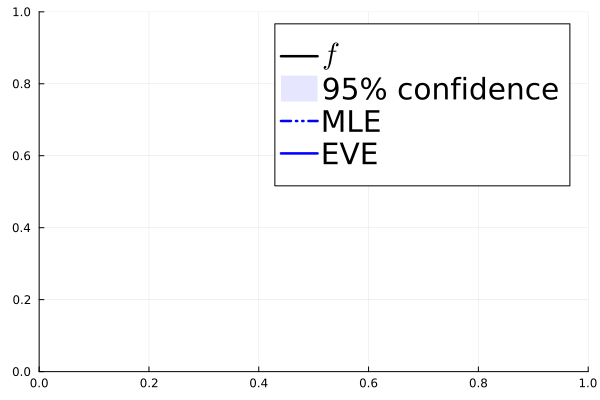

In [3]:
function legend_pxy()
    guide = plot([2],[2],xlim=(0,1), ylim=(0,1), legendfontsize=20, c=:black, label=L"$f$")
    plot!([2], [2], fillrange = [2], fillalpha = 0.1, c=:blue, linewidth=0, label="95% confidence")
    #plot!(xs,fs, seriestype=:scatter, markersize=5, c=:green)
    plot!([2], [2], label="MLE", c=:blue, linewidth=3,linestyle=:dashdotdot)
    plot!([2], [2], label="EVE", c=:blue, linewidth=3,linestyle=:solid)
    return guide
end
guide = legend_pxy()
save(guide, "guide")
guide

In [38]:
function dataset_noise(n,x,noisedistribution)
    f(x) = x
    xs = rand(n)
    fs = f.(xs) + rand(noisedistribution, n);
    
    #standardscaling
    l = minimum(vcat(fs,y))
    u = maximum(vcat(fs,y))    
    s = u-l
    return xs, (fs.-l)/s, (f.(x).-l)/s #, (y.-l)/s
end

dataset_noise (generic function with 2 methods)

In [122]:
function plotslice(py, noisedistribution)
    ϵ = abs(min(minimum(pxy), 0))
    py[abs.(py).<=ϵ].=0
    phat = py[:];
    ptrue = pdf.(noisedistribution, x .- ftrue[end]/2);
    
    phat = phat/sum(phat)
    ptrue = ptrue/sum(ptrue)
    
    b = 0.5
    a = 0.9*(1-b) / (maximum(vcat(ptrue, phat)))
    
    xvalues = range(0,1,length=11);
    xmarks = [0, "", 0.2, "", 0.4, "", 0.6, "", 0.8, "", 1]
    
    pl = plot(xticks=(xvalues, xmarks), yticks=(xvalues, xmarks), xlabel=L"x", ylabel=L"y")
    scatter!(xs, fs,  markersize=5, c=:green, legend=false)
    plot!([0.5,0.5],[0, 1],c=:gray, linewidth=1, label="") 
    plot!(a*ptrue .+ b, x, linewidth=3, c=:black, label="true distribution")
    plot!(a*phat .+ b, x, linewidth=3, c=:blue, label="estimated distribution")
    plot!(guidefontsize=20, tickfontsize=15,left_margin = 5Plots.mm)

end

plotslice (generic function with 1 method)

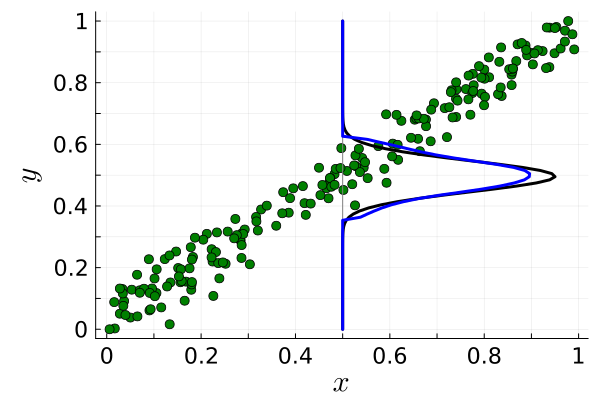

In [127]:
noisedistribution = Normal(0,0.05)
xs,fs,ftrue = dataset_noise(200,x,noisedistribution); #function values are min-max scaled

bipolar=false
l,D = 0.1, 20_000
encoder = realvalue_encoder(l,D, bipolar=bipolar);
Δx = encode(encoder, [0.5])
Δxs = encode(encoder, xs)
Δfs = circshift(encode(encoder, fs), (0,1));
Δy = circshift(encode(encoder, y), (0,1))
    
P = mean(Δxs .* Δfs, dims=1)
pxy = Δx .* P * Δy' /D;

pl = plotslice(pxy[1,:],noisedistribution)
save(pl, "normalnoise")
pl

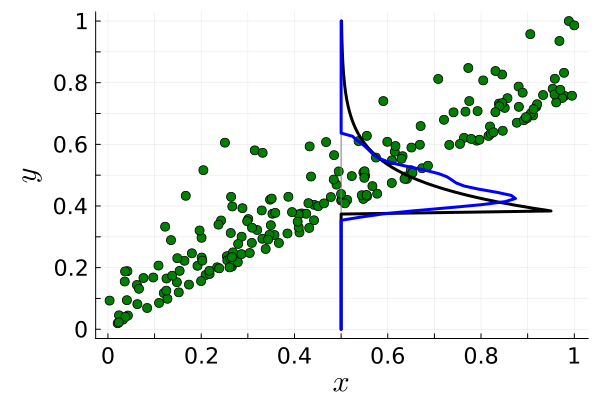

In [142]:
noisedistribution = Exponential(0.1)
xs,fs,ftrue = dataset_noise(200,x,noisedistribution); #function values are min-max scaled

bipolar=false
l,D = 0.1, 20_000
encoder = realvalue_encoder(l,D, bipolar=bipolar);
Δx = encode(encoder, [0.5])
Δxs = encode(encoder, xs)
Δfs = circshift(encode(encoder, fs), (0,1));
Δy = circshift(encode(encoder, y), (0,1))
    
P = mean(Δxs .* Δfs, dims=1)
pxy = Δx .* P * Δy' /D;

pl = plotslice(pxy[1,:],noisedistribution)
save(pl, "exponentialnoise")
pl

┌ Warning: Keyword argument letter not supported with Plots.GRBackend().  Choose from: annotations, arrow, aspect_ratio, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, connections, contour_labels, discrete_values, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, guidefontsize, guidefontvalign, html_output_format, inset_subplots, label, layout, left_margin, legend_background_color, legend_font_color, legend_font_family, legend_font_halign, legend_font_pointsize, legend_font_rotation, legend_font_valign, legend_foreground_color, legend_positio

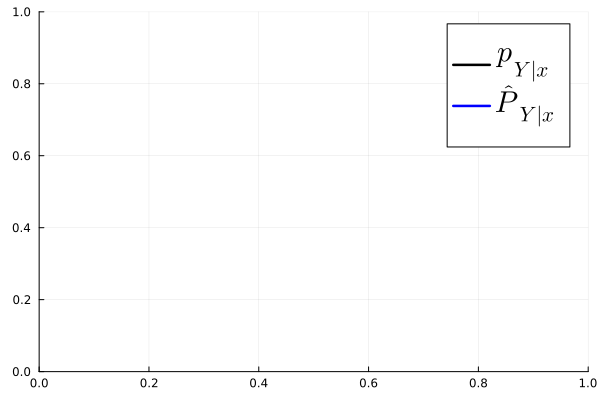

In [4]:
# generate the guide for previous figures
function legend_py()
    guide = plot([2],[2],xlim=(0,1), ylim=(0,1), legendfontsize=20, c=:black, label=L"p_{Y|x}")
    #plot!([],[], markersize=5, label="sample", c=:green)
    plot!([], [], label=L"\hat{P}_{Y|x}", c=:blue, linewidth=3,linestyle=:solid)
    return guide
end
guide = legend_py()
save(guide, "guide_noise")
guide